In [1]:
%matplotlib notebook
import os,sys
import pickle
import math
import random
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.titlesize': 25})
plt.rcParams.update({'axes.labelsize': 23})
plt.rcParams.update({'lines.linewidth' : 3})
plt.rcParams.update({'lines.markersize' : 20})
plt.rcParams.update({'xtick.labelsize' : 20})
plt.rcParams.update({'ytick.labelsize' : 20})
import seaborn as sns


In [2]:
## number of bins for plots/averaging
nbins=50

In [3]:
#data={}
input_filename='param_grid.pkl'
infile = open(input_filename,'rb')
data = pickle.load(infile)
params=data.keys()
params

dict_keys(['INITIAL_R_0', 'MORTALITY_RATE', 'LOCKDOWN_R_0', 'RATE_OF_INFLECTION', 'total_deaths'])

In [4]:
import pandas as pd



In [45]:
df=pd.DataFrame.from_dict(data)
df

INITIAL_R_0  MORTALITY_RATE  LOCKDOWN_R_0  RATE_OF_INFLECTION  \
0             0.6           0.005          0.06                0.15   
1             0.6           0.005          0.12                0.15   
2             0.6           0.005          0.18                0.15   
3             0.6           0.005          0.24                0.15   
4             0.6           0.005          0.30                0.15   
...           ...             ...           ...                 ...   
9985          7.8           0.045          0.78                0.65   
9986          7.8           0.045          1.56                0.65   
9987          7.8           0.045          2.34                0.65   
9988          7.8           0.045          3.12                0.65   
9989          7.8           0.045          3.90                0.65   

      total_deaths  
0     3.882886e+02  
1     4.018820e+02  
2     4.179381e+02  
3     4.372970e+02  
4     4.611941e+02  
...            ...  
9985  1.654125e+07  
9986  1.655273e+07  
9987  1.656420e+07  
9988  1.657566e+07  
9989  1.658710e+07  

[9990 rows x 5 columns]

In [5]:
default_values={}
default_values['INITIAL_R_0']=2.2637755302375644
default_values['MORTALITY_RATE']=0.01
default_values['LOCKDOWN_R_0']=0.9038440070216232
default_values['RATE_OF_INFLECTION']=0.35245146707754205
default_values['total_deaths']=224263.43644312533

In [6]:
## function to make bins out of an array
def binnies(data_array,n_bins=nbins):
    nparray = np.array(data_array)
    binwidth=(max(nparray)-min(nparray))/n_bins
    bins=np.linspace(min(nparray), max(nparray), n_bins) + binwidth/2
    return bins,binwidth


In [7]:
## pass 1D arrays, make 2D arrays mesh and corresponding min/max of the z-variable per 2D bin
## eg min chi2 per bin, or max deaths per bin       
def make_2D_arrays(x_array,y_array,z_array, minmax='max'): 
    x=np.array(x_array)
    y=np.array(y_array)
    z=np.array(z_array)
    x_bins,x_binwidth=binnies(x_array)
    y_bins,y_binwidth=binnies(y_array)
    X_bins, Y_bins = np.meshgrid(x_bins, y_bins)
    Z_bins = np.zeros_like(X_bins)
    for i in range(len(X_bins)):
       for j in range(len(X_bins[i])):
           bin_z = z[ (abs(x-X_bins[i][j])<x_binwidth) & (abs(y-Y_bins[i][j])<y_binwidth) ]
           if bin_z.any():
               if 'max' in minmax: Z_bins[i][j] =  max( bin_z )
               if 'min' in minmax: Z_bins[i][j] =  min( bin_z )
    return X_bins,Y_bins,Z_bins


In [8]:
## function to save figure
def save_plot(fig,param_name,stem='amias',filetype='png'):
    outfile_basename = '%s-%s'%(stem,param_name)
    print( 'writing out %s.%s...'%(outfile_basename,filetype) )
    fig.savefig(outfile_basename+'.'+filetype, bbox_inches='tight')
    #print( 'writing out %s.pkl...'%outfile_basename )
    #pickle.dump(fig,open(outfile_basename+'.pkl','wb'))


In [9]:
## functions to plot 3D with triangulation surfaces 
def plot3D_trisurf(x,y,z,title='plot',paramnames=['x','y','z']):
    plot = plt.figure(figsize=(12,9)).add_subplot(1,1,1,projection='3d',
        title=title
    )
    plot.plot_trisurf(x, y, z, cmap='plasma')
    ##plot.figure.colorbar(**something with axes here**, shrink=0.5, aspect=5)
    #plot.canvas.start_event_loop(sys.float_info.min) #workaround for Exception in Tkinter callback
    plt.show(block=False)
    save_plot(plot.figure,param_name='%s_%s' % (paramnames[0],paramnames[1]),
        stem='amias_3D',filetype='png')
def plot3D_surface(x,y,z,title='plot',paramnames=['x','y','z']):
    plot = plt.figure(figsize=(12,9)).add_subplot(1,1,1,projection='3d',
        title=title
    )
    plot.plot_surface(x, y, z, cmap='plasma')
    plot.set_xlabel('\n'+paramnames[0], linespacing=3.2)
    plot.set_ylabel('\n'+paramnames[1], linespacing=3.2)
    plot.set_zlabel('\n'+paramnames[2], linespacing=3.2)
    plot.dist = 10
    ##plot.figure.colorbar(**something with axes here**, shrink=0.5, aspect=5)
    #plot.figure.show()
    plt.show(block=False)
    #save_plot(plot.figure,param_name='%s_%s' % (paramnames[0],paramnames[1]),
    #   stem='amias_3D',filetype='png')


In [10]:
## function to bin and plot 3D surface vs the z-variable
def plot3D_vsZ(x,y,z,minmax='max',paramnames=['x','y','z']):
    ## x_array=data[xvar]
    X_bins,Y_bins,Z_bins = make_2D_arrays(x,y,z,minmax)
    if Z_bins.all():
        plot3D_surface(
            x=X_bins,
            y=Y_bins,
            z=Z_bins,
            title=r'%s vs %s' % (paramnames[0],paramnames[1]),
            paramnames=paramnames
        )
    else: 
        ## empty Chi2 bin; plot with different technique instead
        plot3D_trisurf(
            x=X_bins[np.where(Z_bins>0)],
            y=Y_bins[np.where(Z_bins>0)],
            z=Z_bins[np.where(Z_bins>0)],
            title=r'%s vs %s' % (paramnames[0],paramnames[1]),
            paramnames=paramnames
        )


<IPython.core.display.Javascript object>


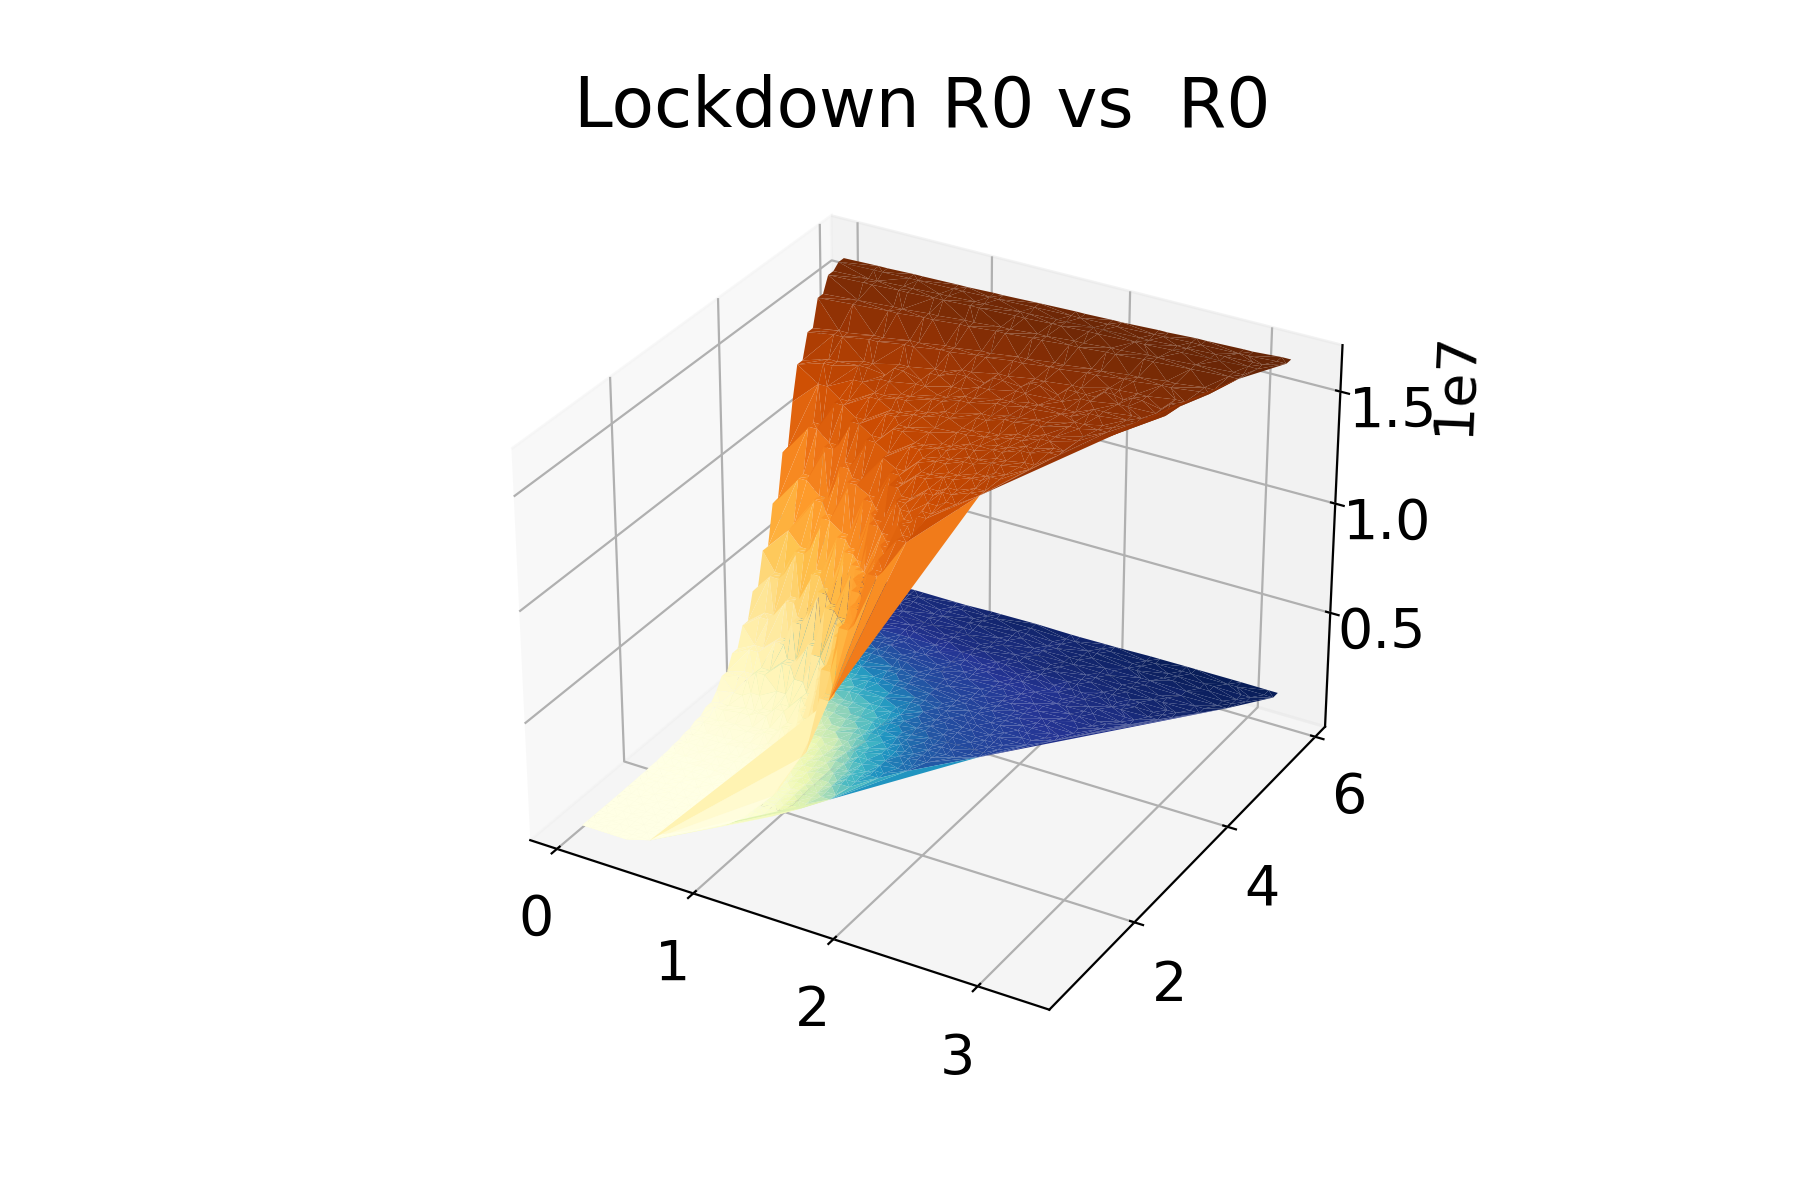

writing out amias_3D-Lockdown R0_ R0.png...


In [11]:
## functions to plot 3D with triangulation surfaces 
def plot3D_trisurf_2hists(x1,y1,z1, x2,y2,z2, title='plot',paramnames=['x','y','z']):
    plot = plt.figure(figsize=(9,6)).add_subplot(1,1,1,projection='3d',
        title=title
    )
    
    #norm = matplotlib.colors.Normalize(vmin=np.min(z1), vmax=np.max(z1))
    norm = matplotlib.colors.Normalize(vmin=np.min(0), vmax=np.max(1e8))

    plot.plot_trisurf(x1, y1, z1, cmap='YlGnBu')#facecolors=plt.cm.magma(norm(z1)) )
    plot.plot_trisurf(x2, y2, z2, cmap='YlOrBr')#facecolors=plt.cm.magma(norm(z1)) )
    
    #m = matplotlib.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    #m.set_array([])
    #plt.colorbar(m)
    
    ##plot.figure.colorbar(**something with axes here**, shrink=0.5, aspect=5)
    #plot.canvas.start_event_loop(sys.float_info.min) #workaround for Exception in Tkinter callback
    plt.show(block=False)
    save_plot(plot.figure,param_name='%s_%s' % (paramnames[0],paramnames[1]),
        stem='amias_3D',filetype='png')
def plot3D_surface_2hists(x1,y1,z1, x2,y2,z2, title='plot',paramnames=['x','y','z']):
    plot = plt.figure(figsize=(10,7)).add_subplot(1,1,1,projection='3d',
        title=title
    )
    
    #norm = matplotlib.colors.Normalize(vmin=np.min(z1), vmax=np.max(z1))
    norm = matplotlib.colors.Normalize(vmin=np.min(0), vmax=np.max(1e8))
    
    plot.plot_surface(x1, y1, z1, cmap='YlGnBu')#facecolors=plt.cm.magma(norm(z1)) )
    plot.plot_surface(x2, y2, z2, cmap='YlOrBr')#facecolors=plt.cm.magma(norm(z1)) )
    plot.set_xlabel('\n'+paramnames[0], linespacing=3.2)
    plot.set_ylabel('\n'+paramnames[1], linespacing=3.2)
    plot.set_zlabel('\n'+paramnames[2], linespacing=3.2)
    plot.dist = 10
    
    #m = matplotlib.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm)
    #m.set_array([])
    #plt.colorbar(m)

    ##plot.figure.colorbar(**something with axes here**, shrink=0.5, aspect=5)
    #plot.figure.show()
    plt.show(block=False)
    #save_plot(plot.figure,param_name='%s_%s' % (paramnames[0],paramnames[1]),
    #   stem='amias_3D',filetype='png')

    
def plot3D_vsZ_2hists(x1,y1,z1, x2,y2,z2, minmax1='min',minmax2='max', paramnames=['x','y','z']):
    ## x_array=data[xvar]
    X1_bins,Y1_bins,Z1_bins = make_2D_arrays(x1,y1,z1,minmax1)
    X2_bins,Y2_bins,Z2_bins = make_2D_arrays(x2,y2,z2,minmax2)
    if Z1_bins.all() and Z1_bins.all():
        plot3D_surface_2hists(
            x1=X1_bins,
            y1=Y1_bins,
            z1=Z1_bins,
            x2=X2_bins,
            y2=Y2_bins,
            z2=Z2_bins,
            title=r'%s vs %s' % (paramnames[0],paramnames[1]),
            paramnames=paramnames
        )
    else: 
        ## empty Chi2 bin; plot with different technique instead
        plot3D_trisurf_2hists(
            x1=X1_bins[np.where(Z1_bins>0)],
            y1=Y1_bins[np.where(Z1_bins>0)],
            z1=Z1_bins[np.where(Z1_bins>0)],
            x2=X2_bins[np.where(Z2_bins>0)],
            y2=Y2_bins[np.where(Z2_bins>0)],
            z2=Z2_bins[np.where(Z2_bins>0)],
            title=r'%s vs %s' % (paramnames[0],paramnames[1]),
            paramnames=paramnames
        )


'''
x=data['MORTALITY_RATE']
y=data['INITIAL_R_0']
z=data['total_deaths']
paramnames=['IFR',' R0','total deaths']
plot3D_vsZ_2hists(x1=x,y1=y,z1=z, x2=x,y2=y,z2=z, paramnames=paramnames)
'''
x=data['LOCKDOWN_R_0']
y=data['INITIAL_R_0']
z=data['total_deaths']
paramnames=['Lockdown R0',' R0','total deaths']
plot3D_vsZ_2hists(x1=x,y1=y,z1=z, x2=x,y2=y,z2=z, paramnames=paramnames)



<IPython.core.display.Javascript object>


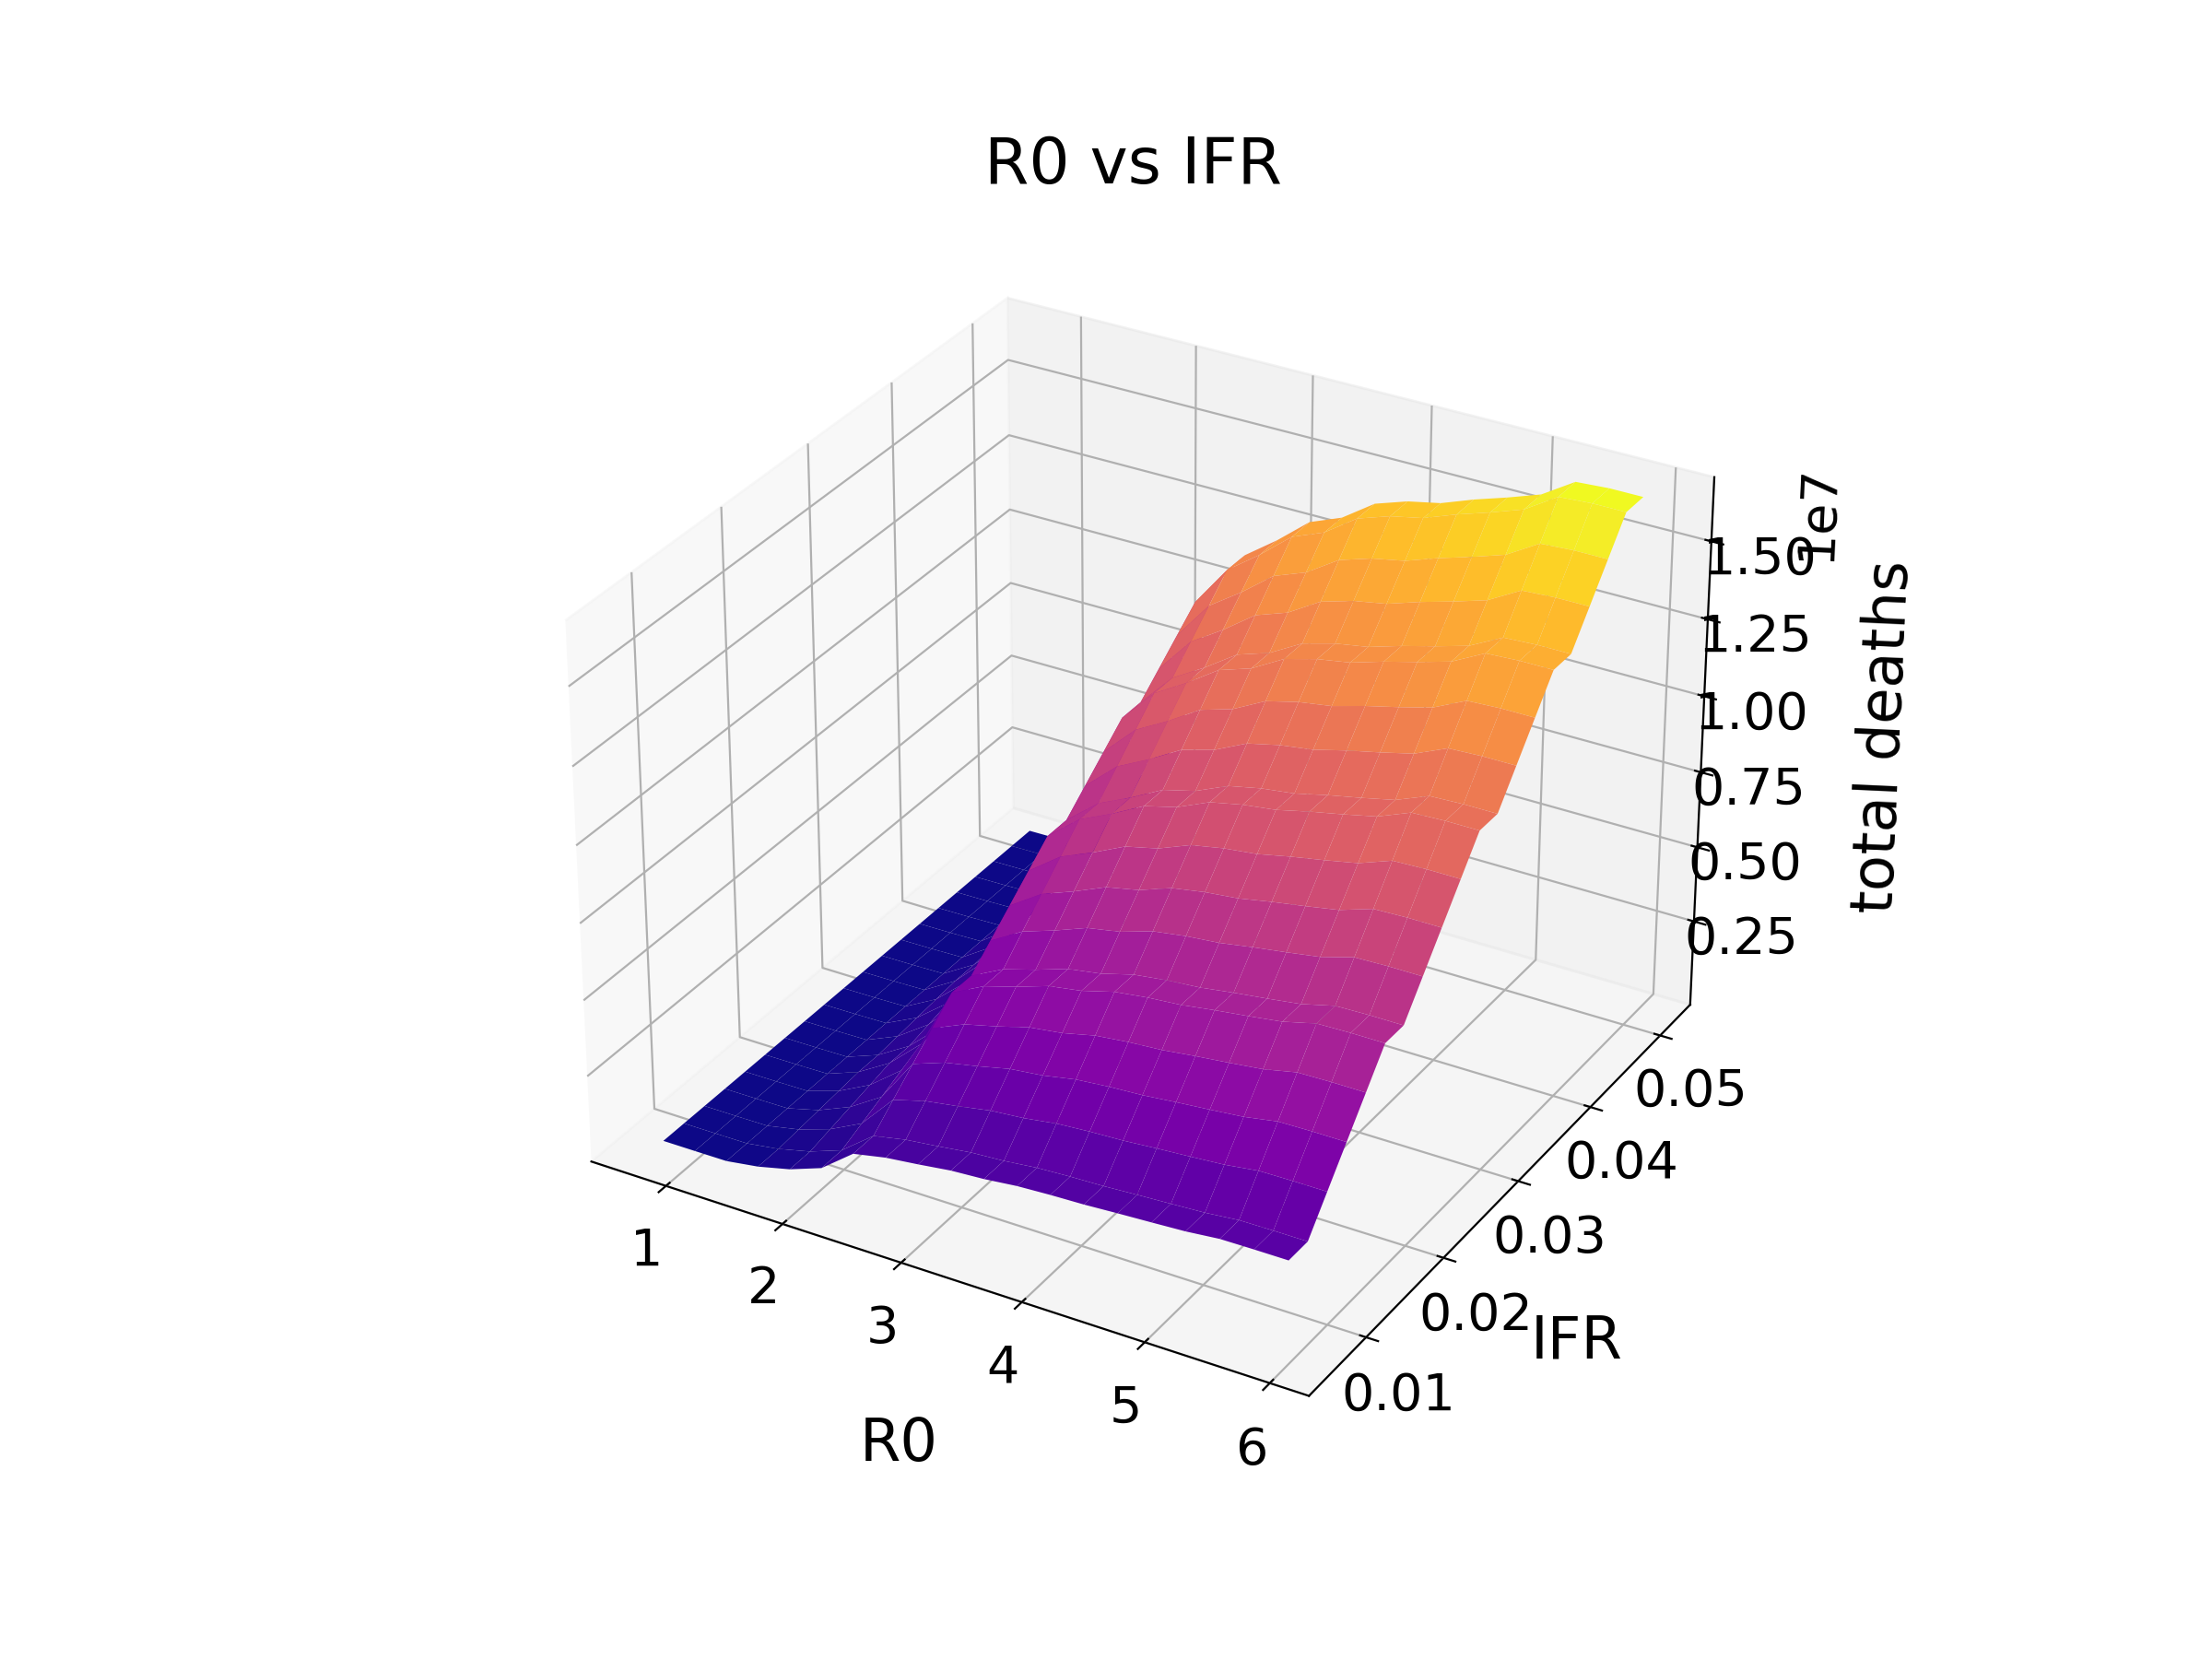

In [11]:
x=data['INITIAL_R_0']
y=data['MORTALITY_RATE']
z=data['total_deaths']
paramnames=['R0','IFR','total deaths']
plot3D_vsZ(x,y,z,minmax='max',paramnames=paramnames)

<IPython.core.display.Javascript object>


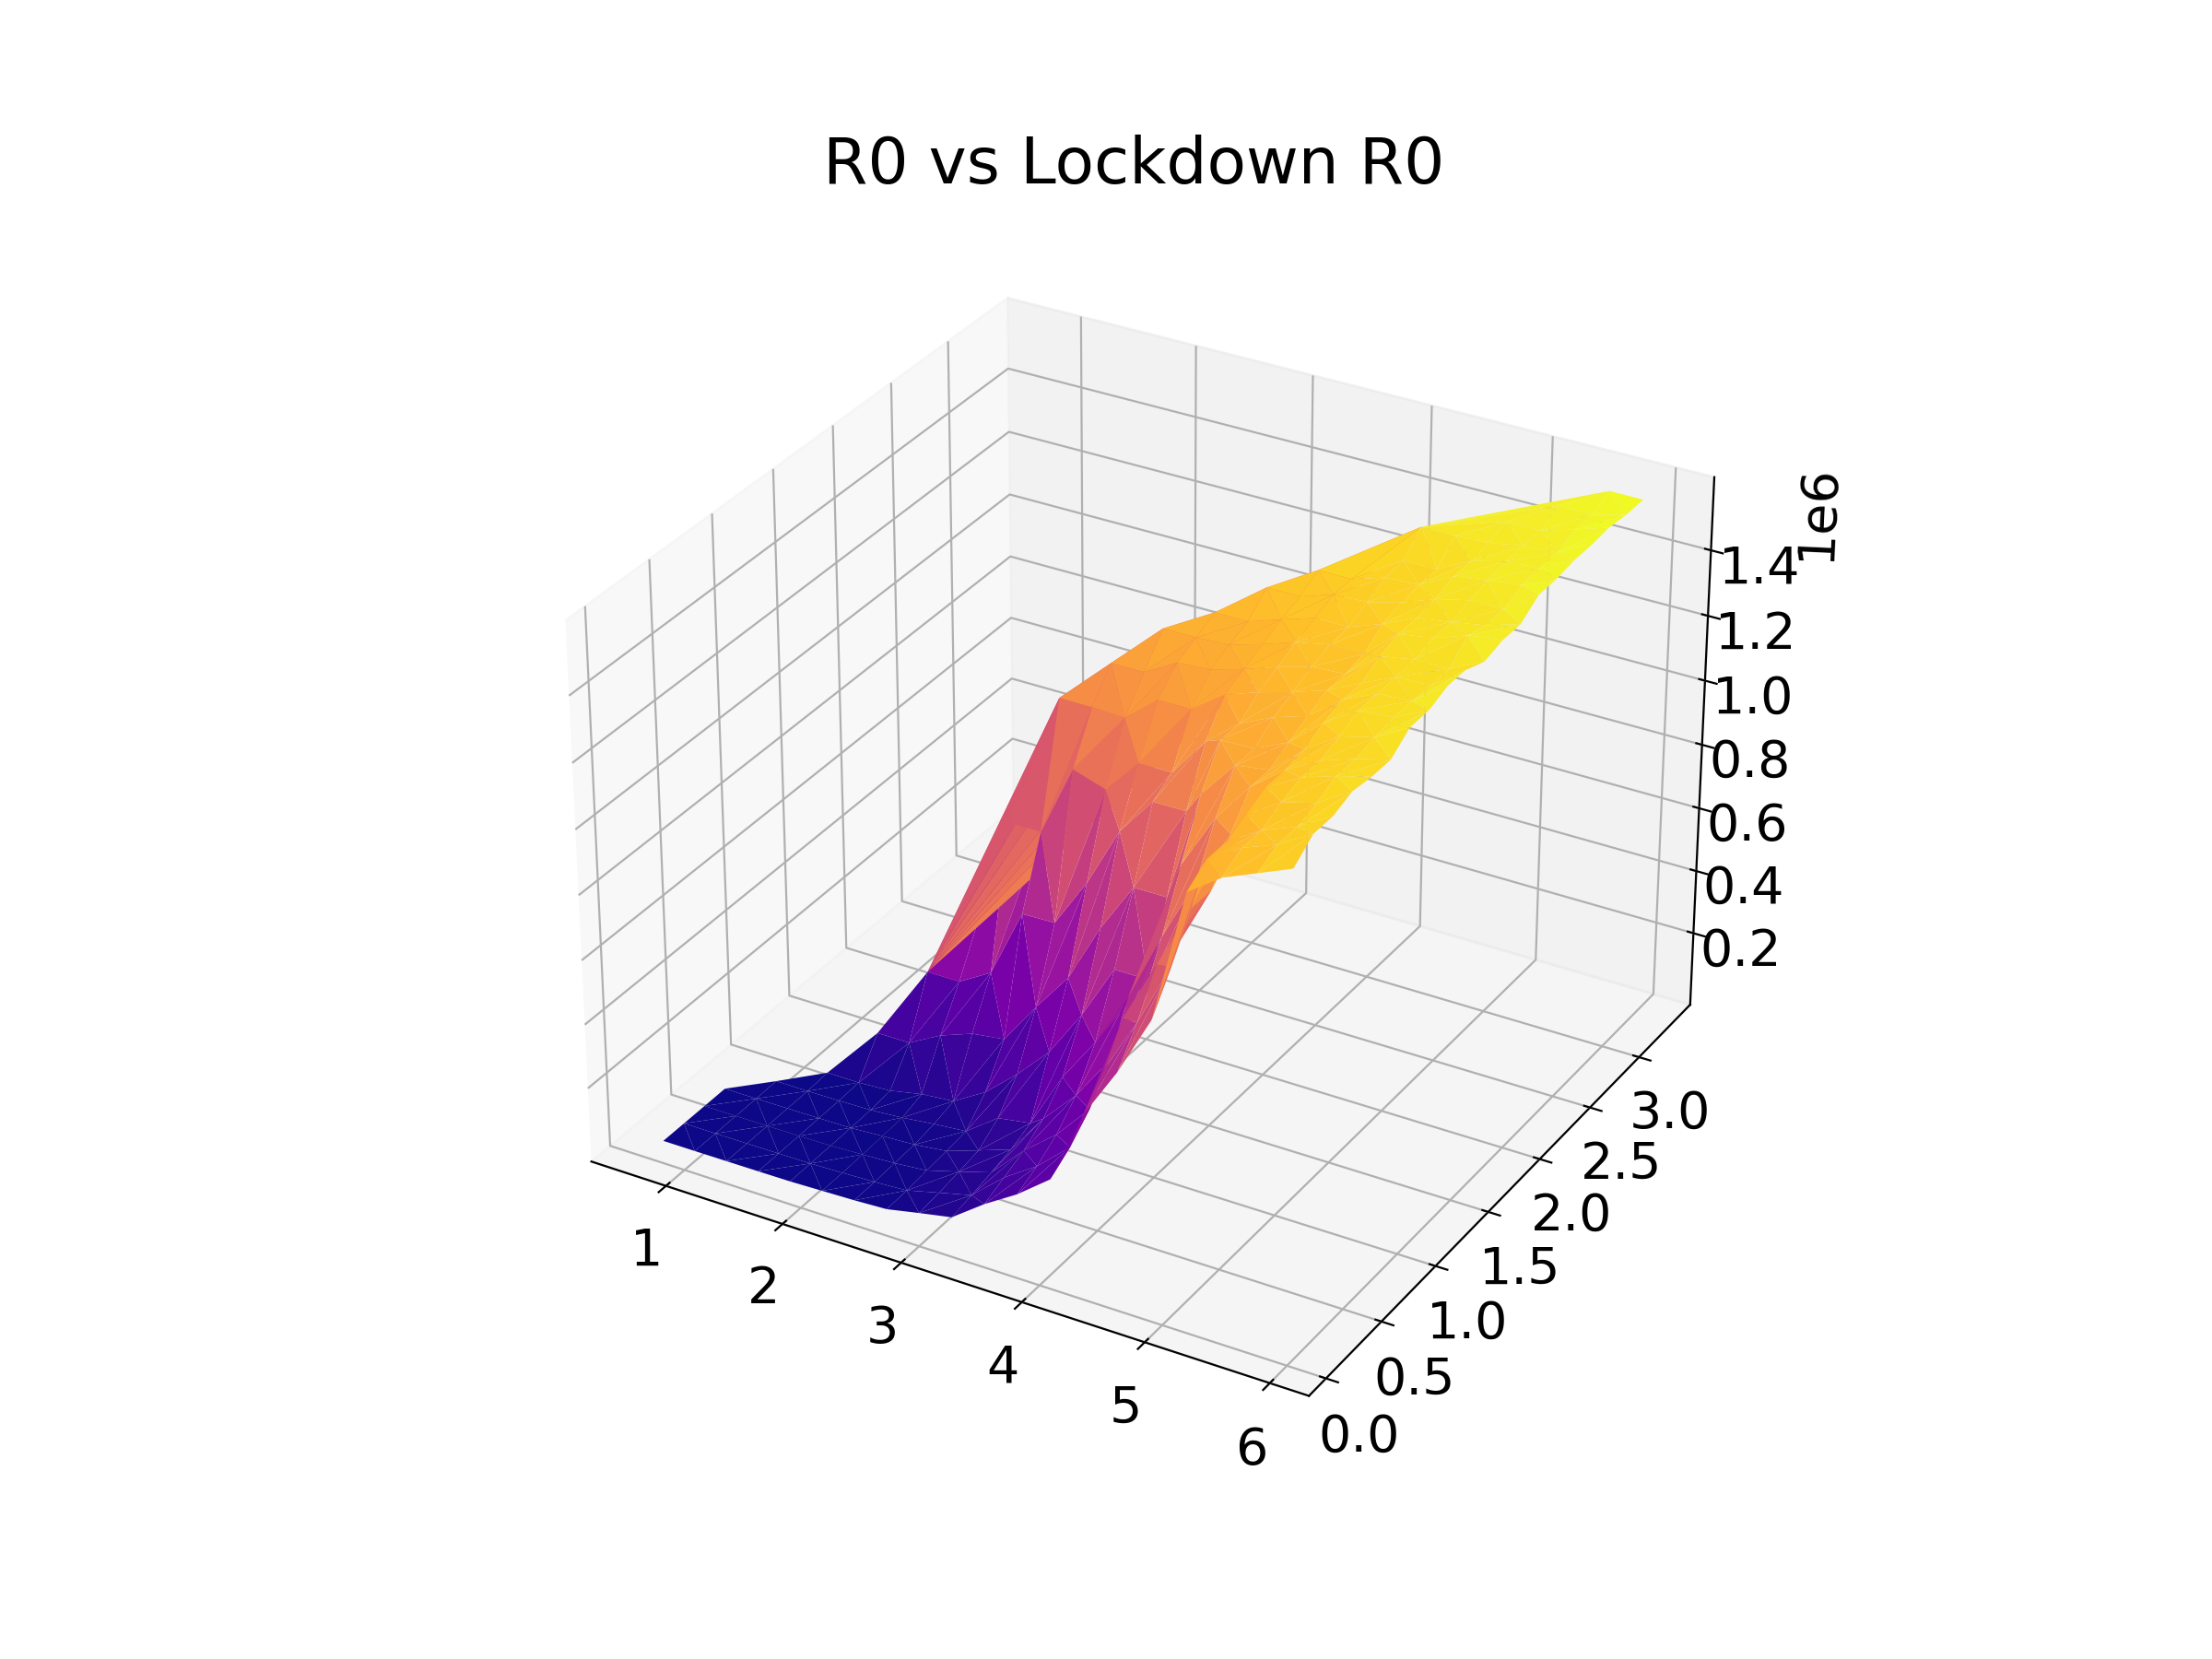

writing out amias_3D-R0_Lockdown R0.png...


In [12]:
x=data['INITIAL_R_0']
y=data['LOCKDOWN_R_0']
z=data['total_deaths']
paramnames=['R0','Lockdown R0','total deaths']
plot3D_vsZ(x,y,z,minmax='min',paramnames=paramnames)

In [18]:
params

dict_keys(['INITIAL_R_0', 'MORTALITY_RATE', 'LOCKDOWN_R_0', 'RATE_OF_INFLECTION', 'total_deaths'])

<IPython.core.display.Javascript object>


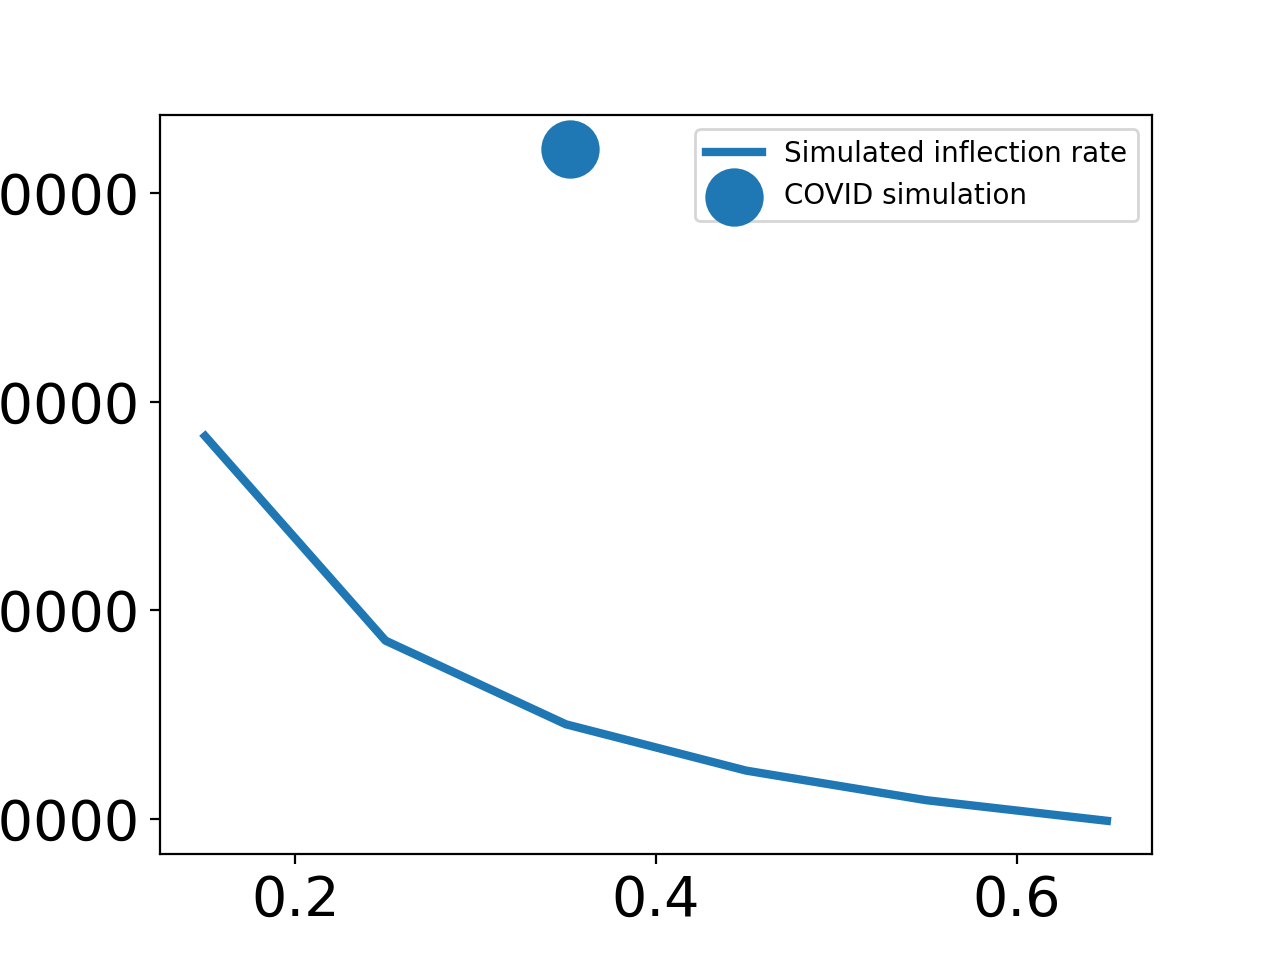

Inflection rates :  [0.15 0.25 0.35 0.45 0.55 0.65]
Total deaths :  [196695.09183109 177077.09107023 169051.25165499 164604.6203516
 161762.40465904 159790.12542829]


In [80]:
mask=( (abs(df['INITIAL_R_0']-default_values['INITIAL_R_0']) <0.1) 
      & (abs(df['MORTALITY_RATE']-default_values['MORTALITY_RATE']) <0.002)
      & (abs(df['LOCKDOWN_R_0']-default_values['LOCKDOWN_R_0']) <0.1)
     )
x=df.loc[mask,['RATE_OF_INFLECTION']].values[:,0]
y=df.loc[mask,['total_deaths']].values[:,0]
plt.plot(x,y, label='Simulated inflection rate')
plt.scatter(default_values['RATE_OF_INFLECTION'], default_values['total_deaths'], label='COVID simulation')
plt.legend()
plt.show()
print('Inflection rates : ', x)
print('Total deaths : ', y)

<IPython.core.display.Javascript object>


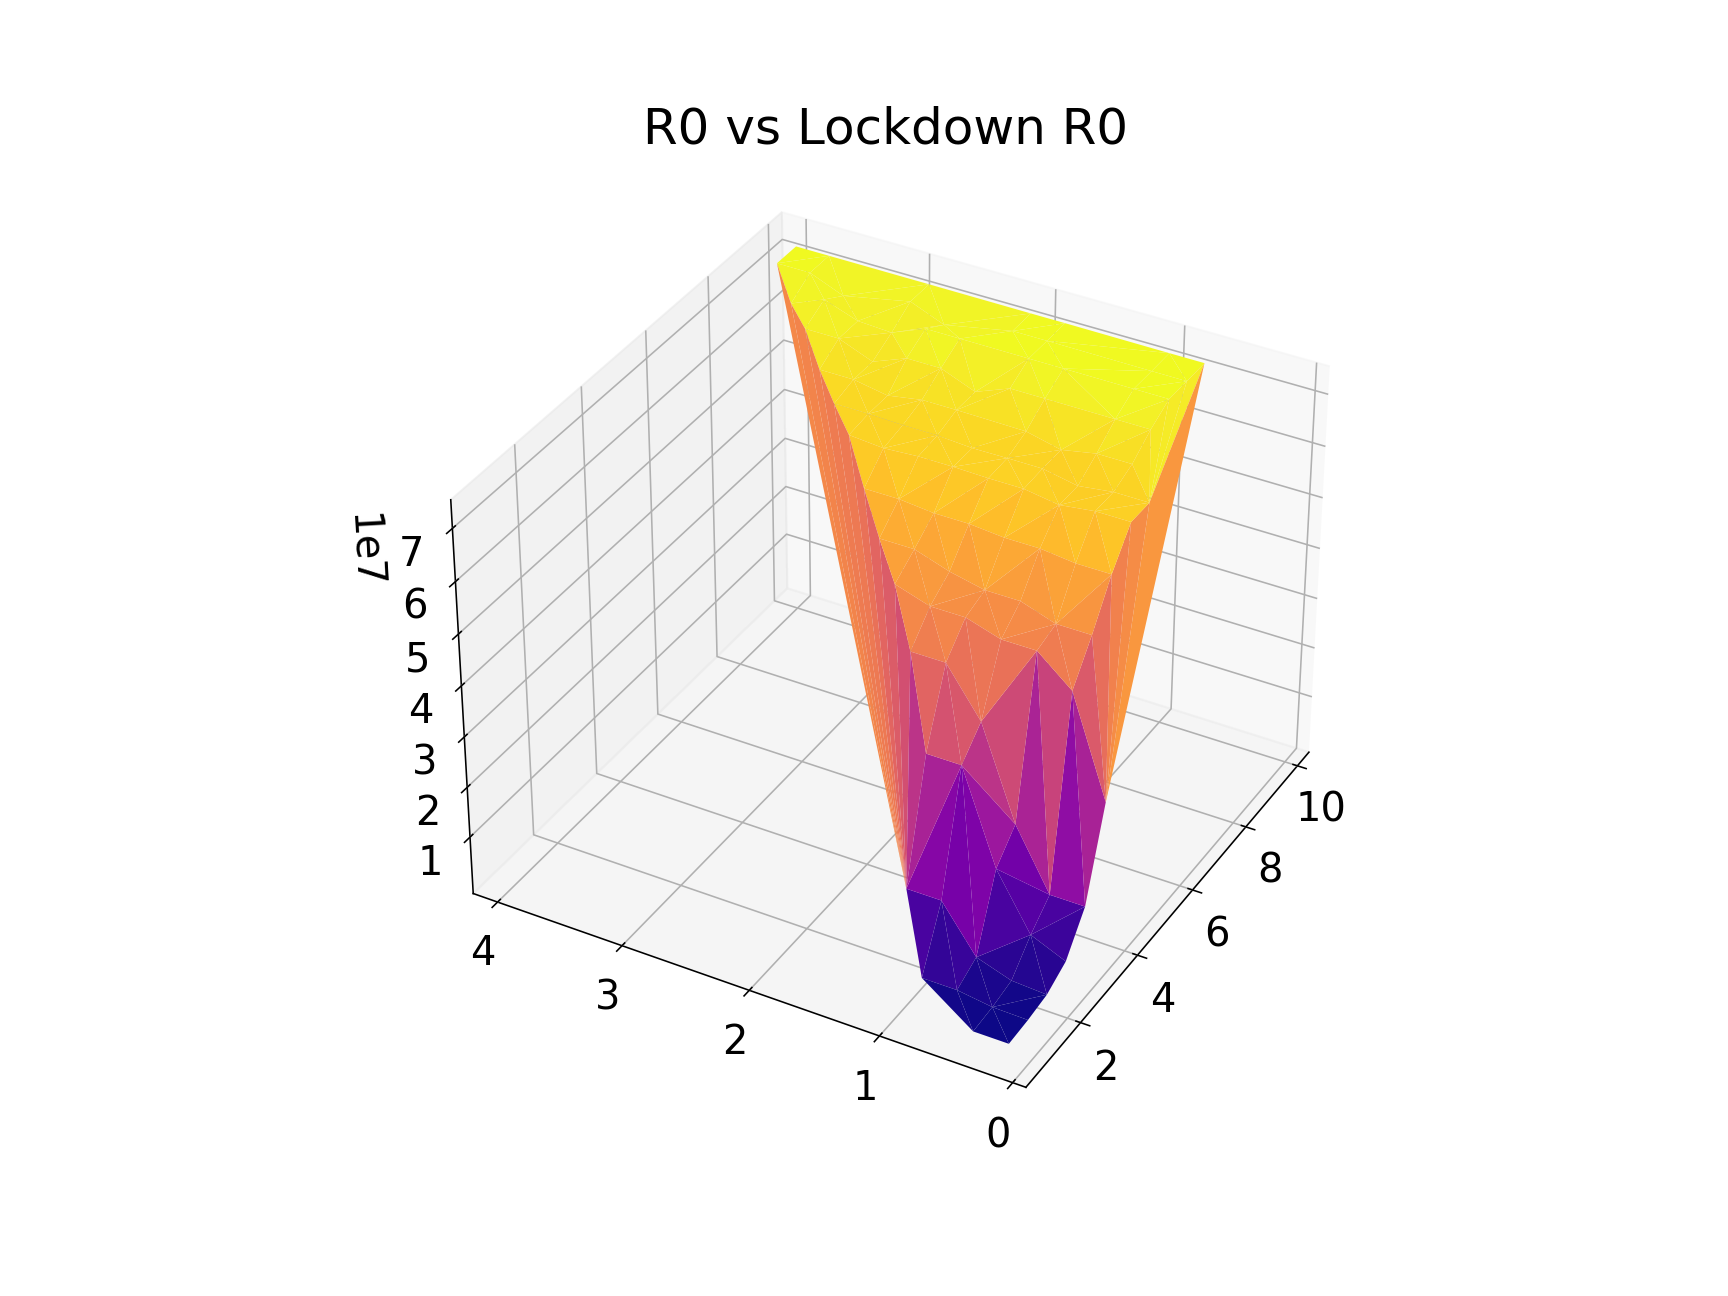

writing out amias_3D-R0_Lockdown R0.png...


In [62]:
x=data['INITIAL_R_0']
y=data['LOCKDOWN_R_0']
z=data['total_deaths']
paramnames=['R0','Lockdown R0','total deaths']
plot3D_vsZ(x,y,z,minmax='max',paramnames=paramnames)


<IPython.core.display.Javascript object>


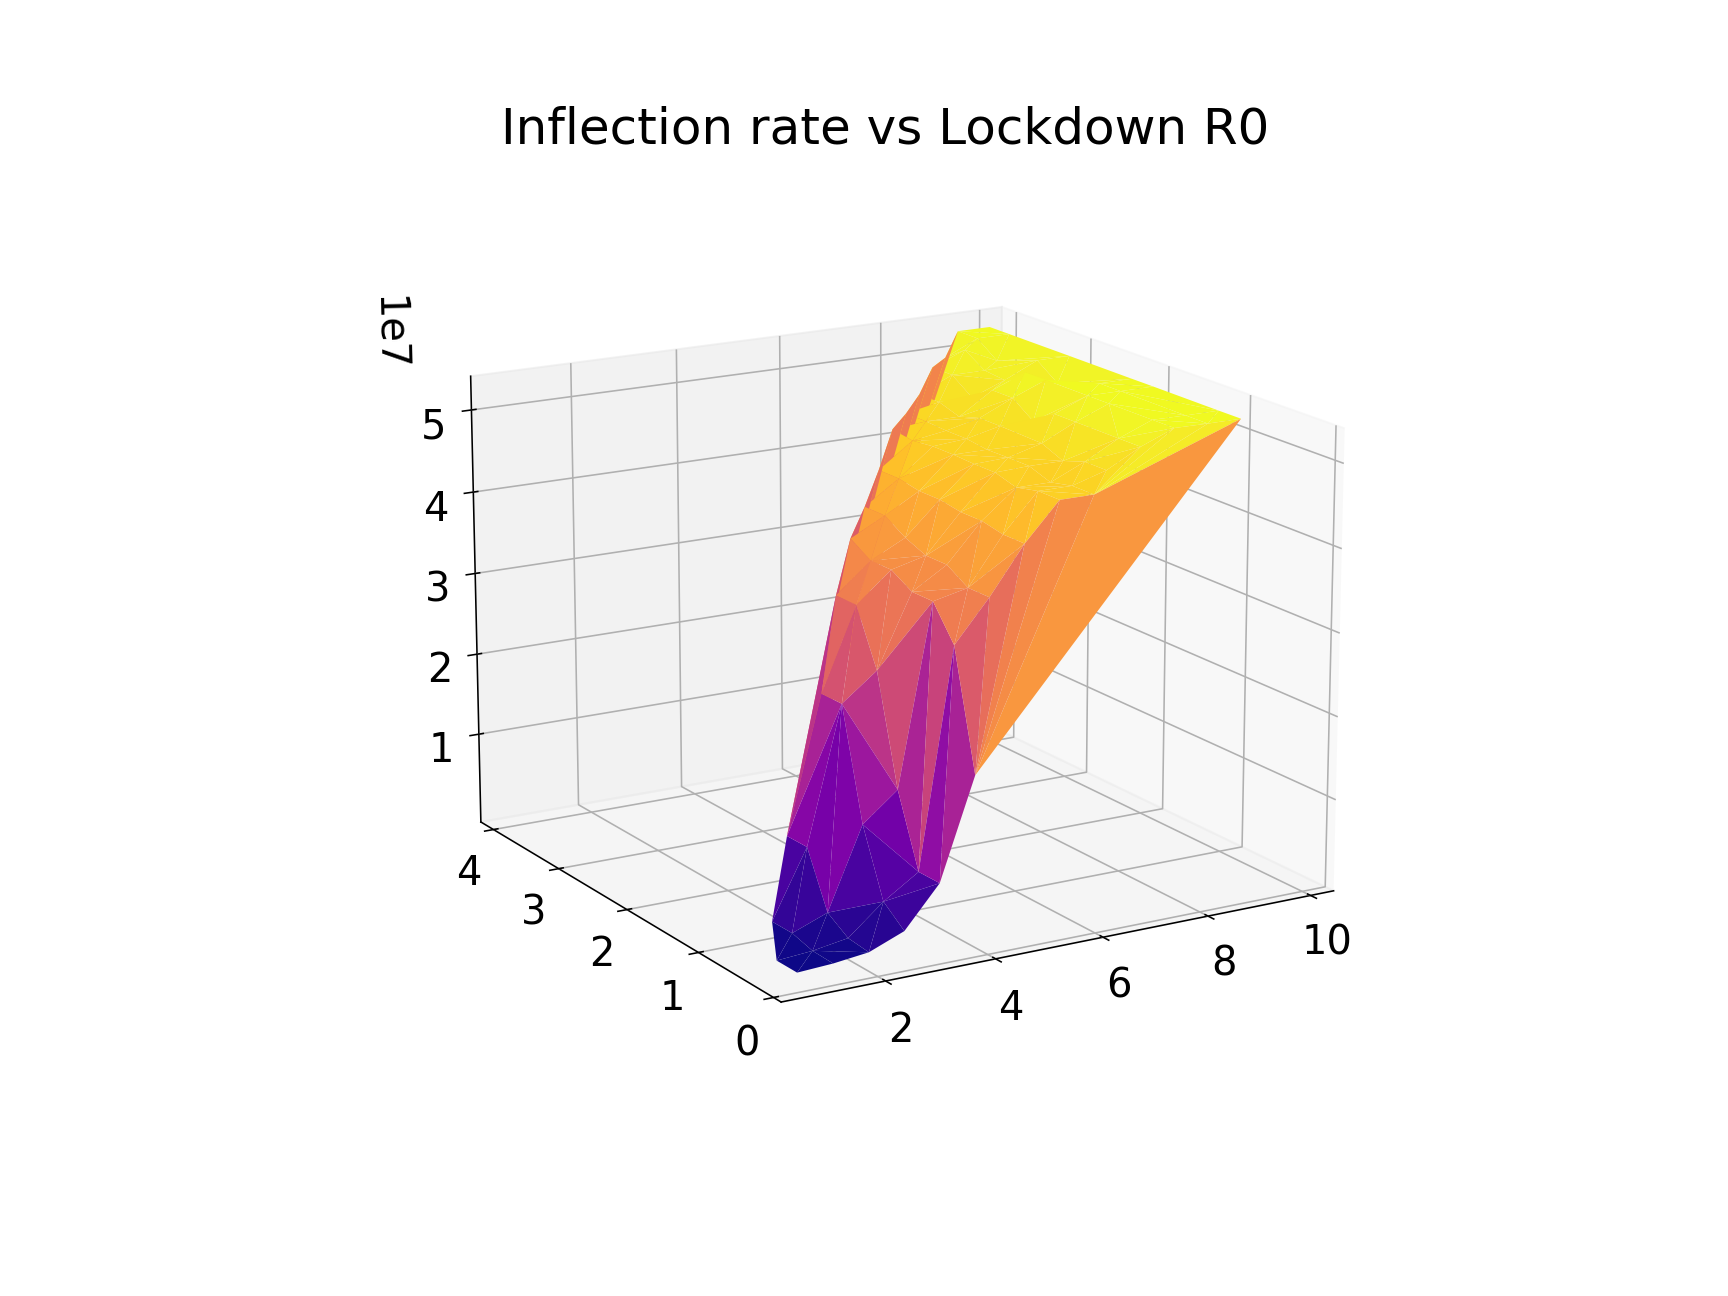

writing out amias_3D-Inflection rate_Lockdown R0.png...


In [76]:
cut_var1=data['MORTALITY_RATE']
x=[values for values, values_cut1 in zip(data['INITIAL_R_0'], cut_var1) if (values_cut1<=0.145)]
y=[values for values, values_cut1 in zip(data['LOCKDOWN_R_0'], cut_var1) if (values_cut1<=0.145)]
z=[values for values, values_cut1 in zip(data['total_deaths'], cut_var1) if (values_cut1<=0.145)]
paramnames=['Inflection rate','Lockdown R0','total deaths']
plot3D_vsZ(x,y,z,minmax='max',paramnames=paramnames)

<IPython.core.display.Javascript object>


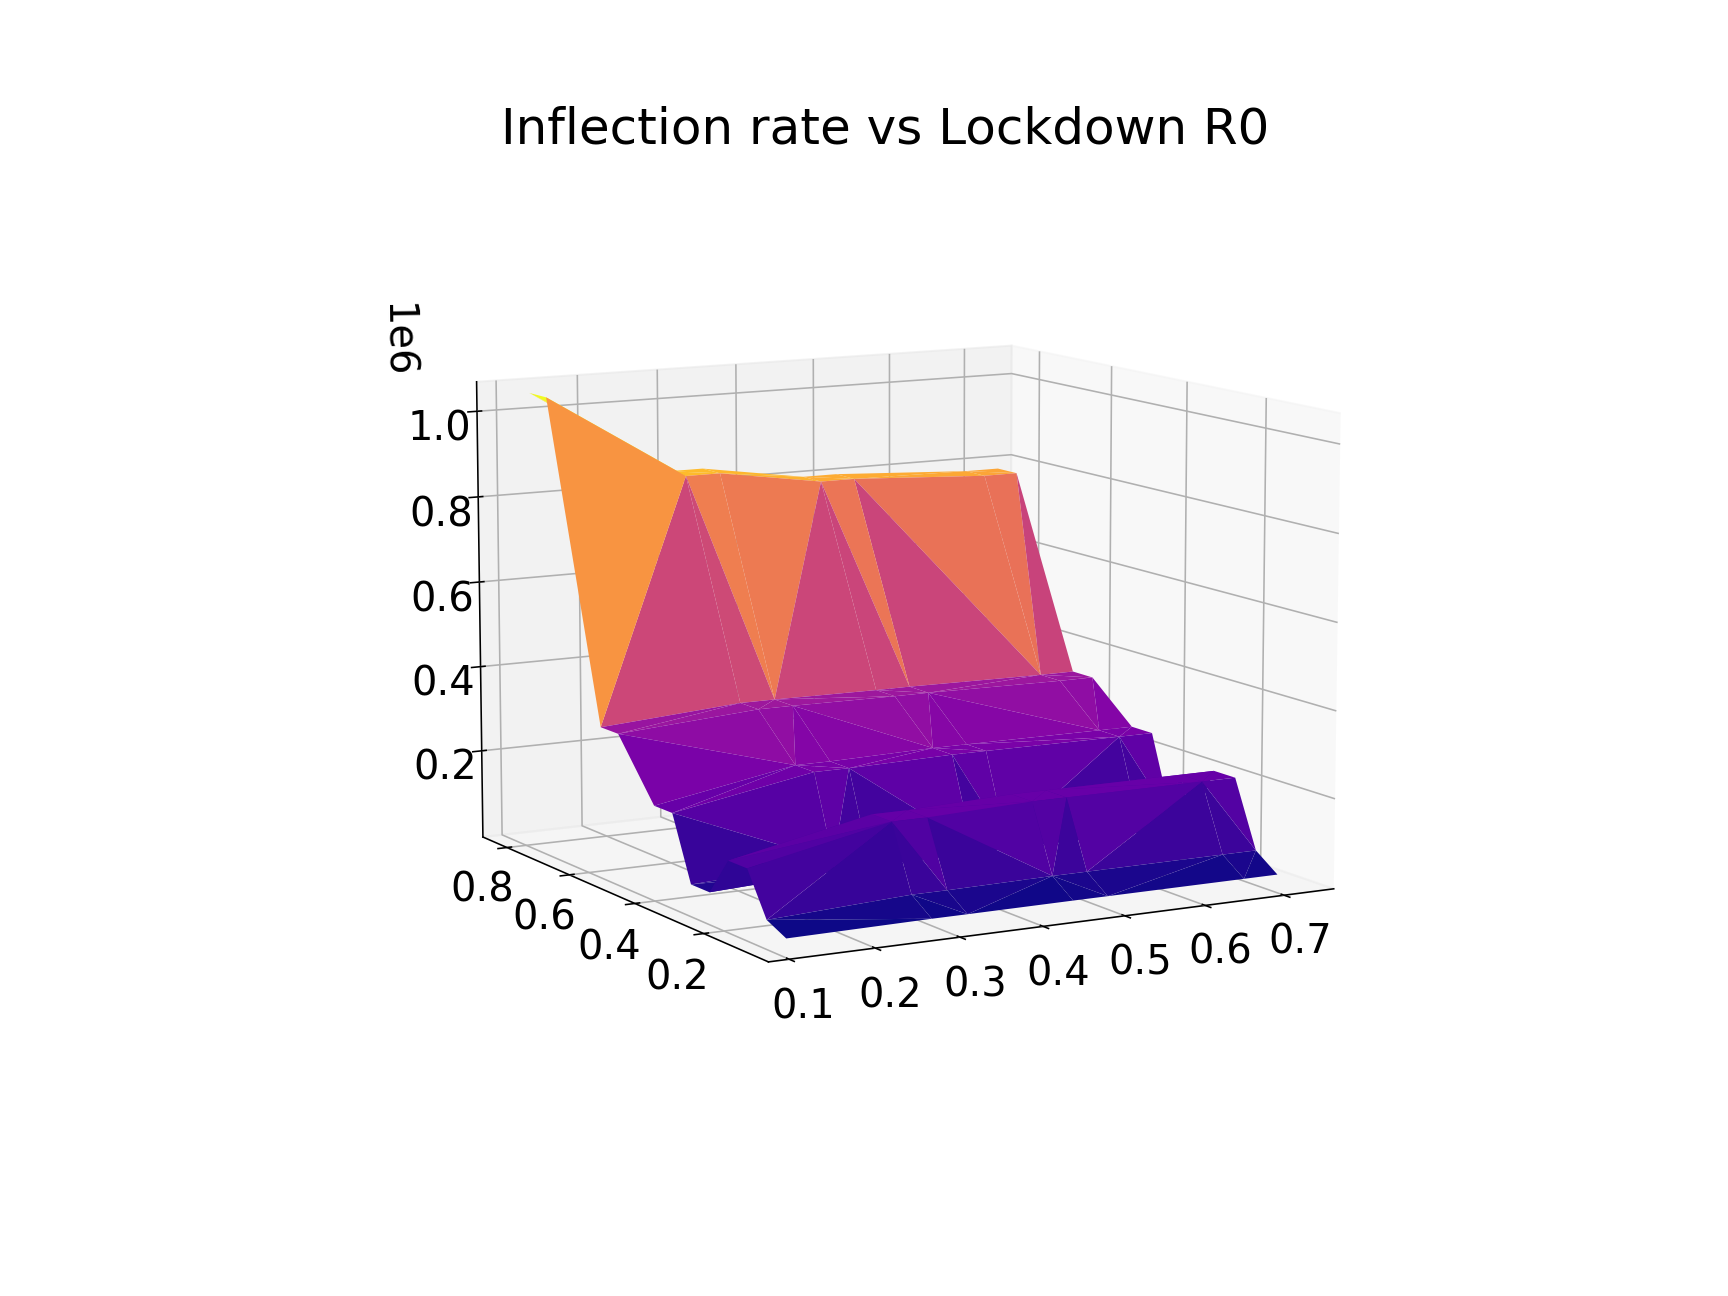

writing out amias_3D-Inflection rate_Lockdown R0.png...


In [73]:
cut_var1=data['INITIAL_R_0']
cut_var2=data['MORTALITY_RATE']
x=[values for values, values_cut1, values_cut2 in zip(data['RATE_OF_INFLECTION'], cut_var1, cut_var2) if ((values_cut1<=2) and (values_cut2<=0.14))]
y=[values for values, values_cut1, values_cut2 in zip(data['LOCKDOWN_R_0'], cut_var1, cut_var2) if ((values_cut1<=2) and (values_cut2<=0.14))]
z=[values for values, values_cut1, values_cut2 in zip(data['total_deaths'], cut_var1, cut_var2) if ((values_cut1<=2) and (values_cut2<=0.14))]
paramnames=['Inflection rate','Lockdown R0','total deaths']
plot3D_vsZ(x,y,z,minmax='max',paramnames=paramnames)

<IPython.core.display.Javascript object>


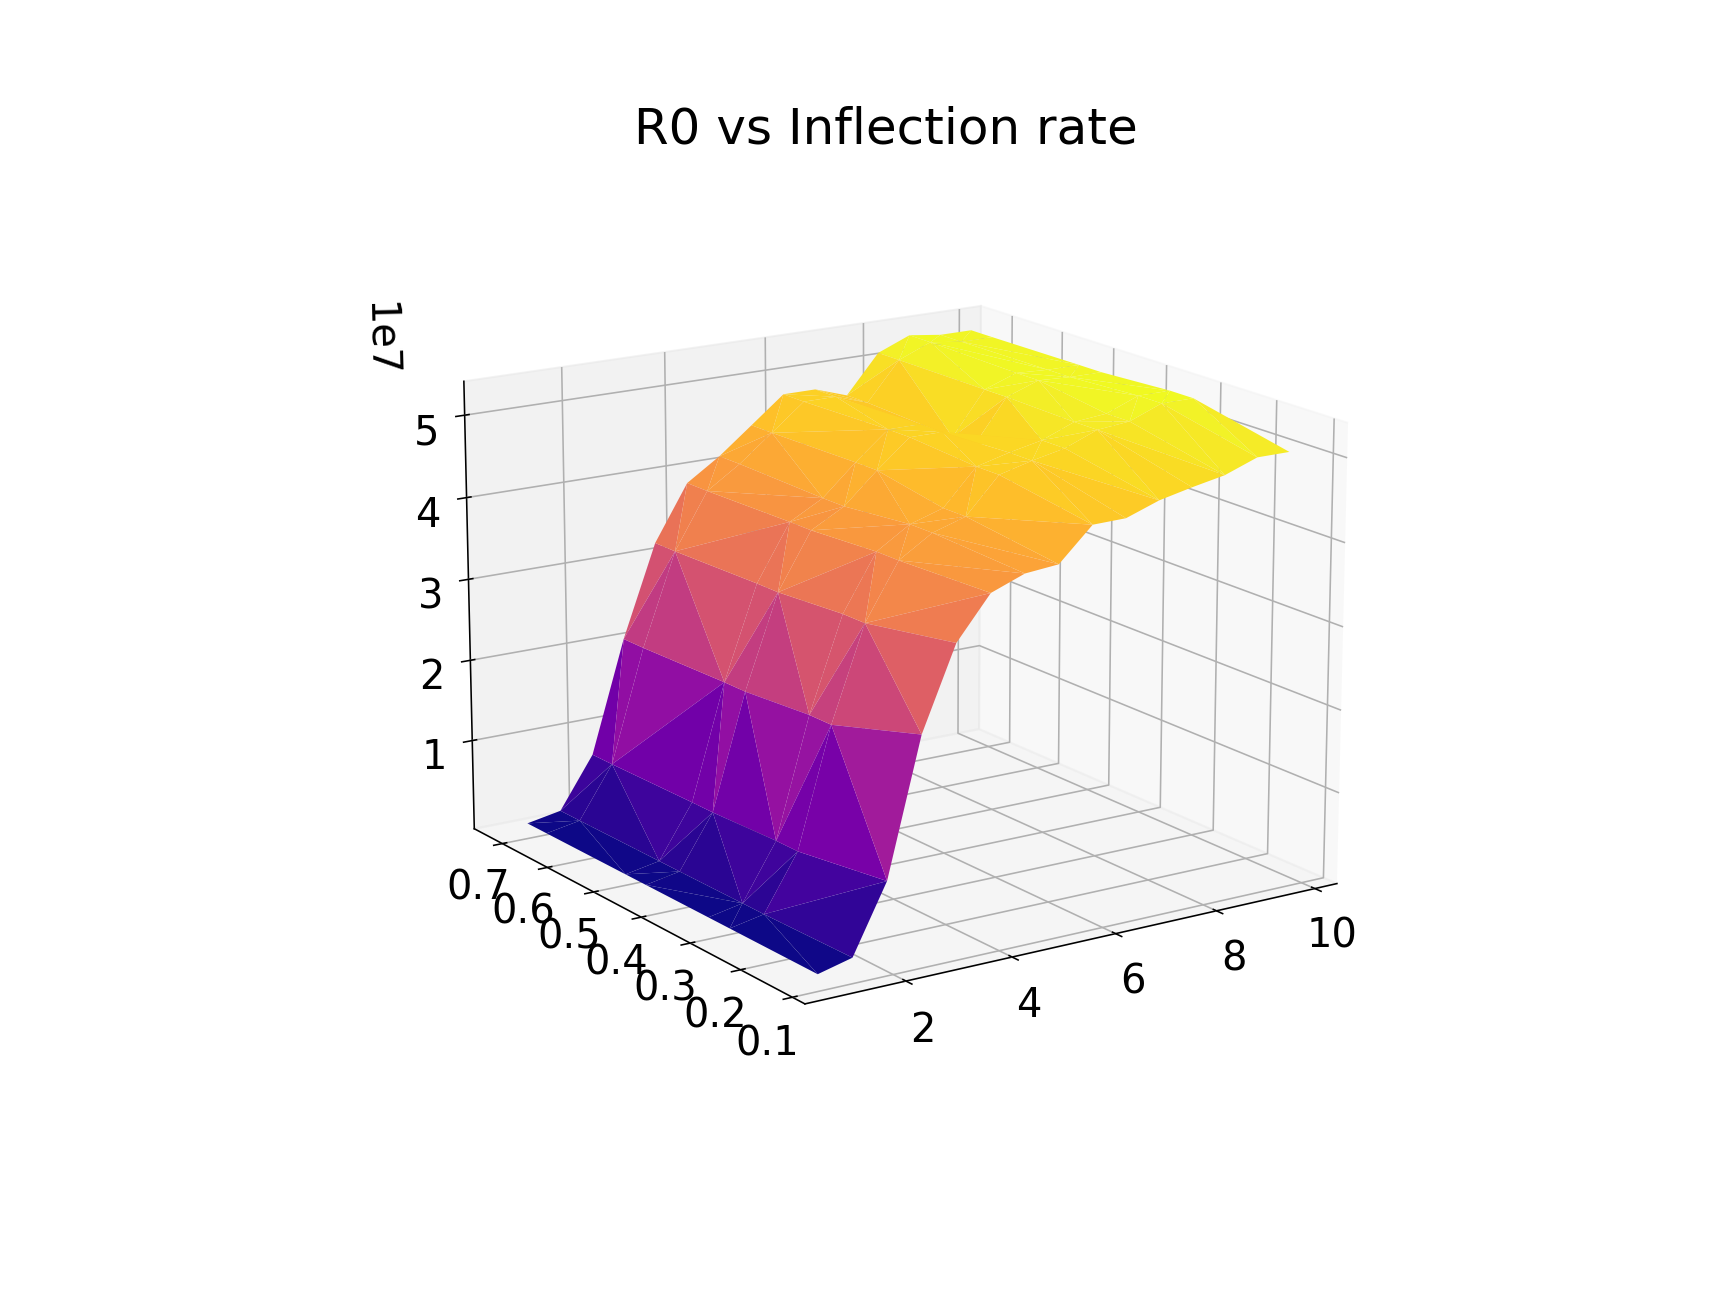

writing out amias_3D-R0_Inflection rate.png...


In [77]:
cut_var1=data['MORTALITY_RATE']
x=[values for values, values_cut1 in zip(data['INITIAL_R_0'], cut_var1) if (values_cut1<=0.145)]
y=[values for values, values_cut1 in zip(data['RATE_OF_INFLECTION'], cut_var1) if (values_cut1<=0.145)]
z=[values for values, values_cut1 in zip(data['total_deaths'], cut_var1) if (values_cut1<=0.145)]
paramnames=['R0','Inflection rate','total deaths']
plot3D_vsZ(x,y,z,minmax='max',paramnames=paramnames)

# Plot deaths vs time

In [13]:
filename='real_data/cum_deaths_vs_days.csv'
df = pd.read_csv(filename)
print(df)


          Days         Deaths
0     1.625280    2221.874511
1     5.054333    2221.874511
2     8.483386    2221.874511
3    11.912438    2221.874511
4    15.341491    2221.874511
..         ...            ...
80  275.949494  278733.825503
81  279.378547  286612.328891
82  282.807600  294961.190690
83  286.236652  303721.616098
84  288.107045  308131.226204

[85 rows x 2 columns]


In [14]:
df.keys()

Index(['Days', 'Deaths'], dtype='object')

In [15]:
filename='savefiles/baseline.csv'
df_sim = pd.read_csv(filename)
print(df_sim)



        # dates     infections  hospitalizations      deaths  mean_r_t
0    2020-02-05    1089.899348               0.0    0.000000  2.263776
1    2020-02-06    1089.899348               0.0    0.000000  2.263773
2    2020-02-07    1089.899348               0.0    0.000000  2.263773
3    2020-02-08    1089.899348               0.0    0.000000  2.263771
4    2020-02-09    1089.899348               0.0    0.000000  2.263770
..          ...            ...               ...         ...       ...
266  2020-10-28  399527.064178           66176.0  860.747799  1.093232
267  2020-10-29  407128.665398           67053.0  870.478097  1.094856
268  2020-10-30  414994.398403           67965.0  880.644457  1.096463
269  2020-10-31  423132.398378           68913.0  891.257821  1.098054
270  2020-11-01  431551.060225           69898.0  902.329631  1.099628

[271 rows x 5 columns]


In [16]:
df_sim['days'] = pd.Series(list(range(len(df_sim))))


In [17]:
df_sim['deaths'].cumsum()

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
           ...      
266    220718.726436
267    221589.204533
268    222469.848991
269    223361.106812
270    224263.436443
Name: deaths, Length: 271, dtype: float64

<IPython.core.display.Javascript object>


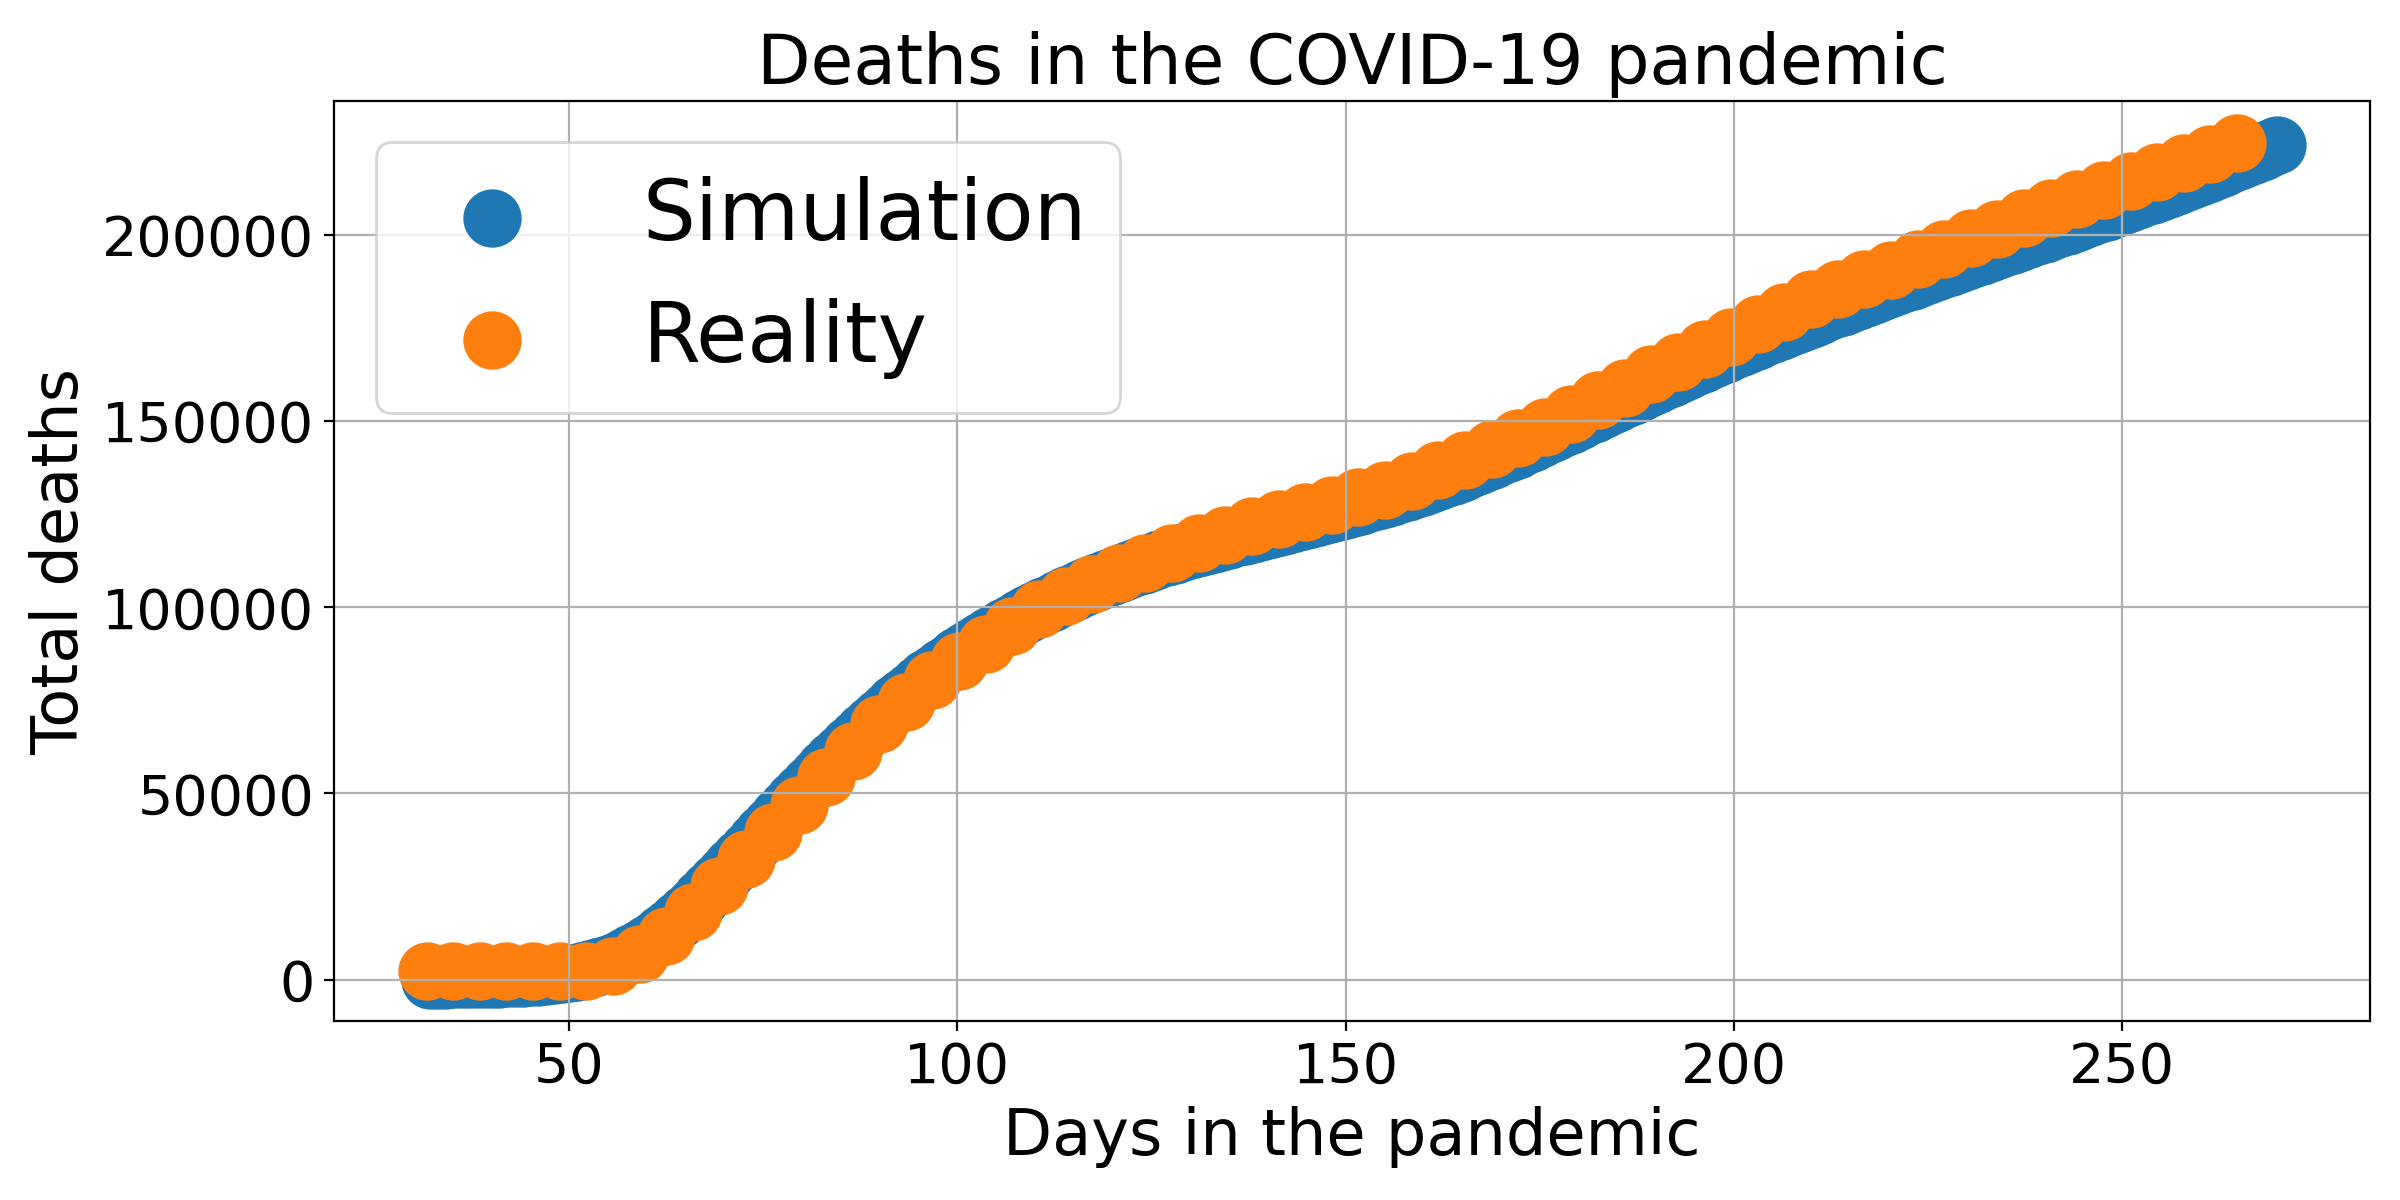

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(df_sim['days'][32:], df_sim['deaths'][32:].cumsum(), label='Simulation')
plt.scatter(df['Days'][:-16]+30, df['Deaths'][:-16], label='Reality')
plt.title('Deaths in the COVID-19 pandemic')
plt.xlabel('Days in the pandemic')
plt.ylabel('Total deaths')
plt.legend(prop={'size': 30})
plt.grid()
plt.tight_layout()